# This notebook analyzes the glycosidic torsion x for the rg and unmod for the central 14 steps around the lesion

## First of all, import usful libraries

In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import sys, getopt

from matplotlib import pyplot
from pylab import *
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_color_codes("pastel")
sns.set(style="darkgrid")

## Read data

In [11]:
df=pd.read_csv("./rg14_unmod14_chi", header=None, delim_whitespace=True).reset_index()

In [13]:
df[:5]
print df.shape

(70000, 29)


In [4]:
list1=["index"]
list2=["rg"+str(x) for x in range(67,81)]
list3=["unmod"+str(x) for x in range(67,81)]
names= list1+list2+list3

## Assign column names, and review the dataframe

In [14]:
df.columns=names
print df.shape
df[:5]
#print df.drop(df.columns[[0]], axis=1, inplace=True)

(70000, 29)


,index,rg67,rg68,rg69,rg70,rg71,rg72,rg73,rg74,rg75,...,unmod71,unmod72,unmod73,unmod74,unmod75,unmod76,unmod77,unmod78,unmod79,unmod80
0,0,-102.4640,-110.6255,-132.8259,-114.3269,-78.7709,-99.7912,-166.3467,-109.5035,-97.4929,...,-117.3249,-111.4696,-135.4012,-115.9052,-141.7967,-80.2045,-78.0575,-149.8850,-74.4790,-90.7281
1,1,-114.2785,-76.0588,-132.1960,-98.1915,-108.2992,-85.8811,176.4257,-105.0483,-112.3292,...,-99.7661,-115.2404,-134.9484,-104.2572,-129.0153,-88.1086,-82.9112,-154.0785,-89.1871,-106.3507
2,2,-109.7305,-99.6336,-105.2186,-111.5986,-103.2213,-96.1974,-164.8782,-114.4011,-136.3000,...,-125.5176,-127.1019,-114.9921,-102.1311,-134.9167,-91.4420,-74.6222,-123.6467,-102.5947,-103.3987
3,3,-116.0145,-126.7550,-123.2562,-120.5297,-97.2377,-96.5139,-173.8957,-119.6524,-102.9099,...,-98.2682,-130.7223,-120.2646,-119.7316,-124.9662,-101.5892,-90.5575,-110.3176,-93.7348,-110.8749
4,4,-113.1688,-98.8576,-110.8898,-103.7483,-95.5820,-105.2267,-171.5217,-103.9663,-90.5285,...,-112.9503,-107.0311,-124.9572,-107.6580,-133.6665,-109.5401,-99.9111,-113.4779,-91.6620,-97.2210


In [15]:
df.columns

Index([u'index', u'rg67', u'rg68', u'rg69', u'rg70', u'rg71', u'rg72', u'rg73',
       u'rg74', u'rg75', u'rg76', u'rg77', u'rg78', u'rg79', u'rg80',
       u'unmod67', u'unmod68', u'unmod69', u'unmod70', u'unmod71', u'unmod72',
       u'unmod73', u'unmod74', u'unmod75', u'unmod76', u'unmod77', u'unmod78',
       u'unmod79', u'unmod80'],
      dtype='object')

# Preview a step far away from the lesion

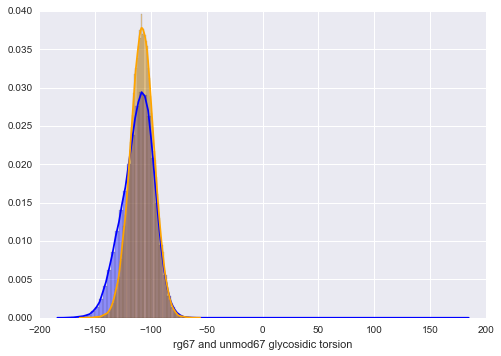

In [17]:
fig, ax = plt.subplots()
sns.distplot(df['rg67'],bins=100, color='blue')
sns.distplot(df['unmod67'],bins=100, color='orange')
ax.set_xlabel("rg67 and unmod67 glycosidic torsion")

# Preview the lesion step

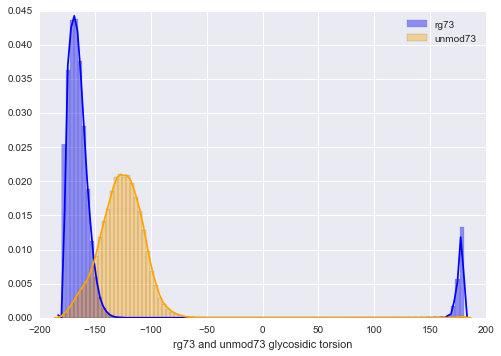

In [19]:
fig, ax = plt.subplots()
sns.distplot(df['rg73'],bins=100, color='blue',label='rg73')
sns.distplot(df['unmod73'],bins=100, color='orange',label='unmod73')
plt.legend()
ax.set_xlabel("rg73 and unmod73 glycosidic torsion")

# Normalize the range to 0 to 360 degrees

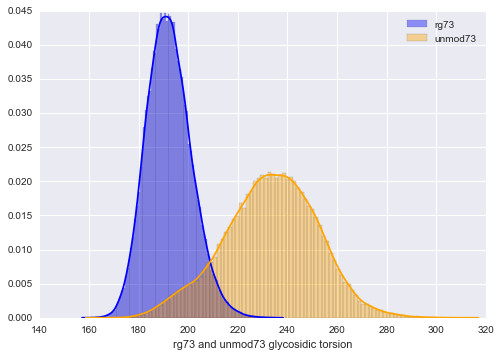

In [21]:
fig, ax = plt.subplots()
df['rg73']=df['rg73'].map(lambda x: x+360 if x <0 else x)
df['unmod73']=df['unmod73'].map(lambda x: x+360 if x <0 else x)
sns.distplot(df['rg73'],bins=100, color='blue',label='rg73')
sns.distplot(df['unmod73'],bins=100,color='orange',label='unmod73')
plt.legend()
ax.set_xlabel("rg73 and unmod73 glycosidic torsion")

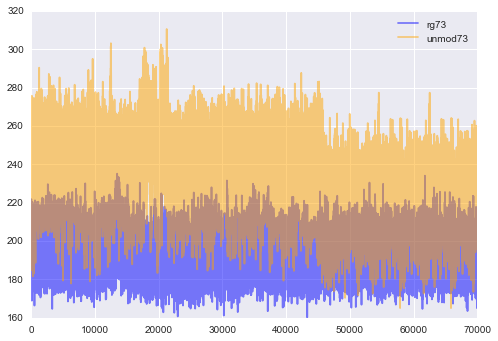

In [24]:
df_73=df[['rg73','unmod73']]
df_73.plot(color=["blue","orange"],alpha=0.5)

# I am going to define a function for this plot so that I can apply to all plots 

In [26]:
def histplot(step):
    rg='rg'+str(step)
    unmod='unmod'+str(step)
    fig, ax = plt.subplots(figsize=(10,10))
    df[rg]=df[rg].map(lambda x: x+360 if x <0 else x)
    df[unmod]=df[unmod].map(lambda x: x+360 if x <0 else x)
    sns.distplot(df[rg],bins=100, color='blue',label=rg)
    sns.distplot(df[unmod], bins=100, color='orange',label=unmod)
    plt.legend()
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    ax.set_xlabel(rg +" and " + unmod + " glycosidic torsion in degrees")
    plt.savefig("./chi_plots/chi_hist_"+str(step)+".png")

## plot all

67
68
69
70
71
72
73
74
75
76
77
78
79
80


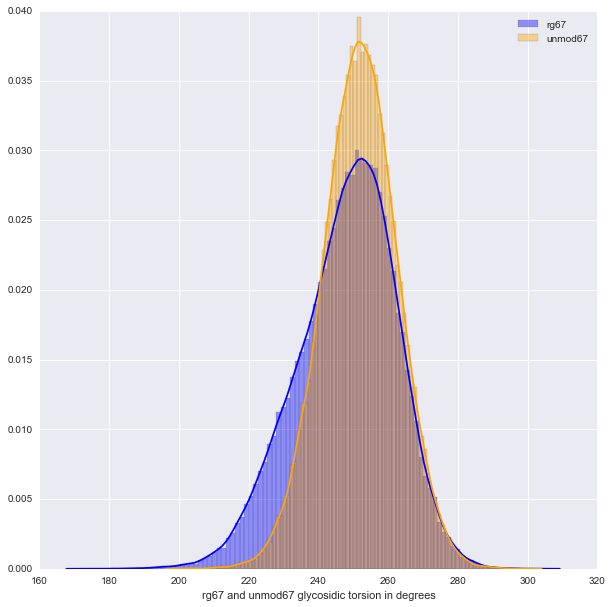

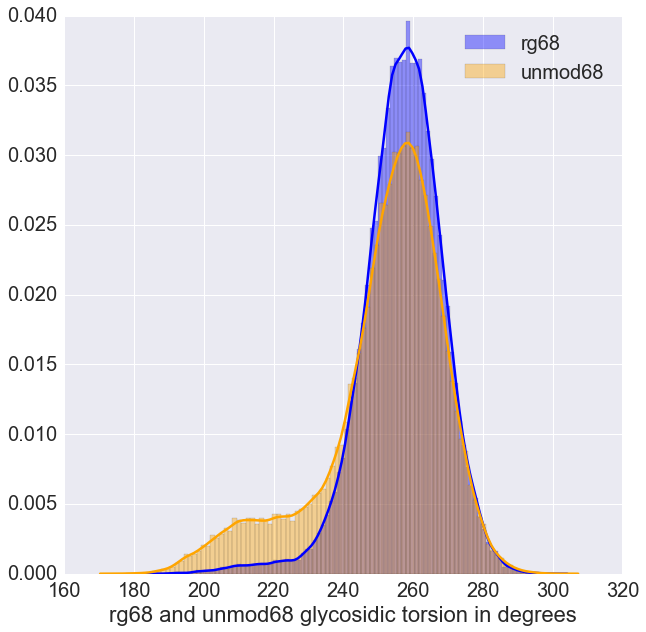

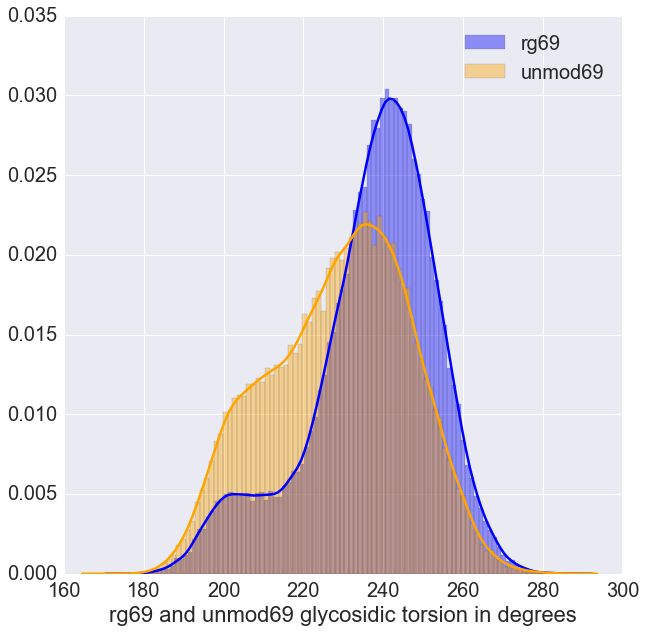

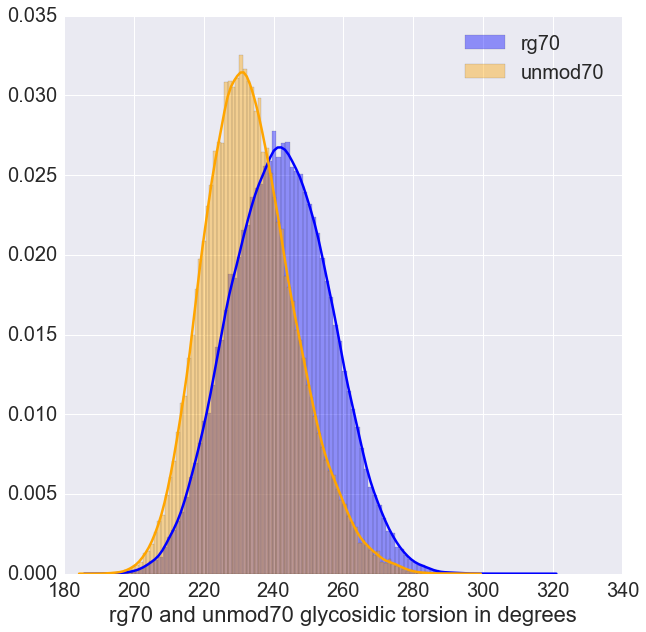

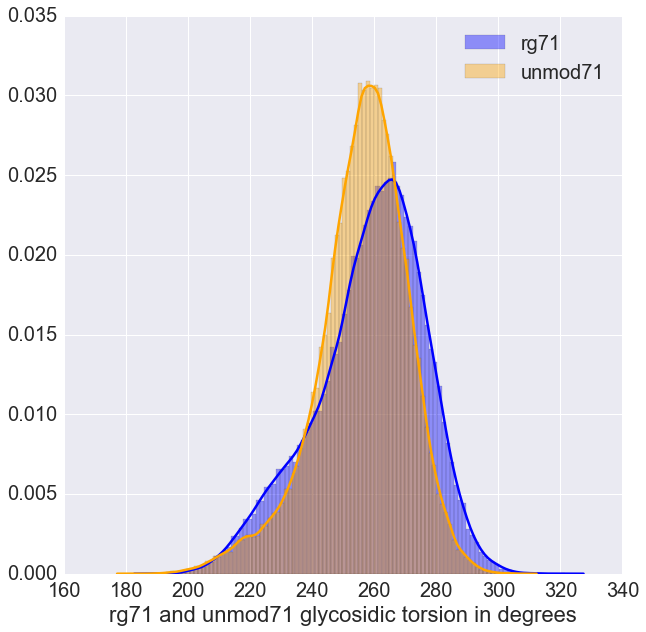

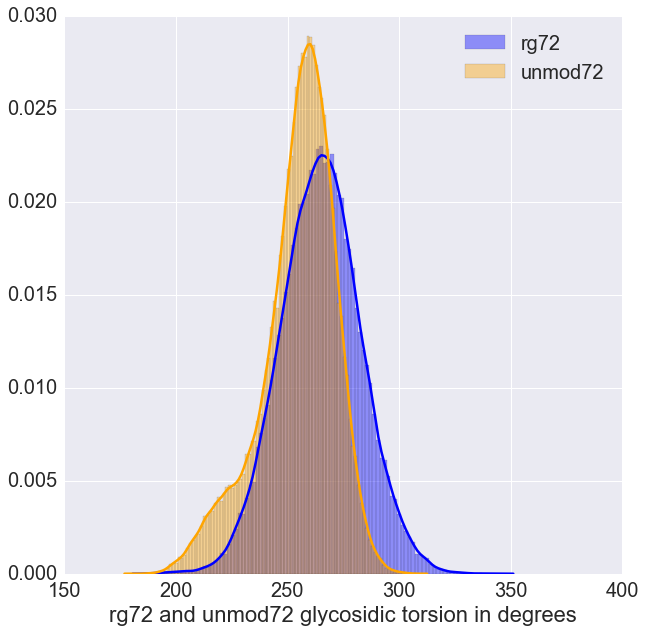

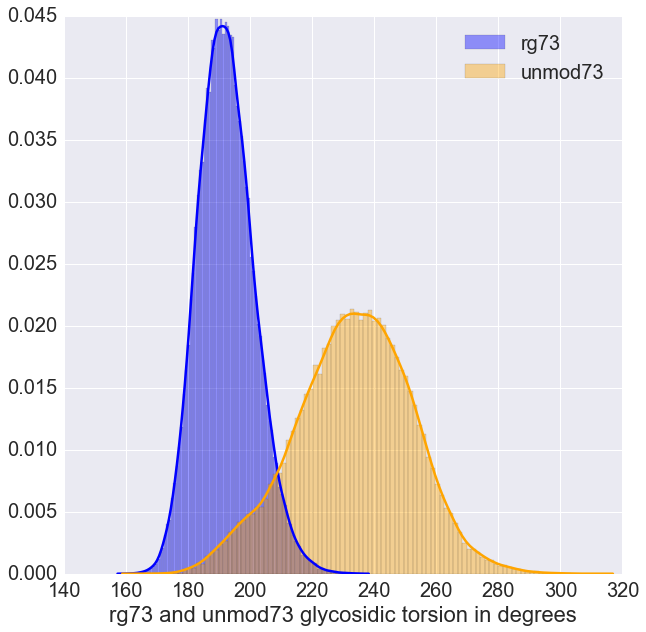

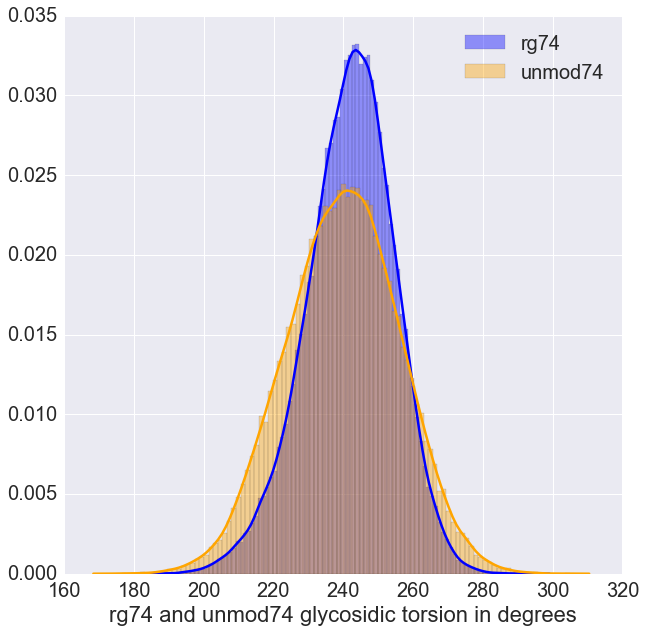

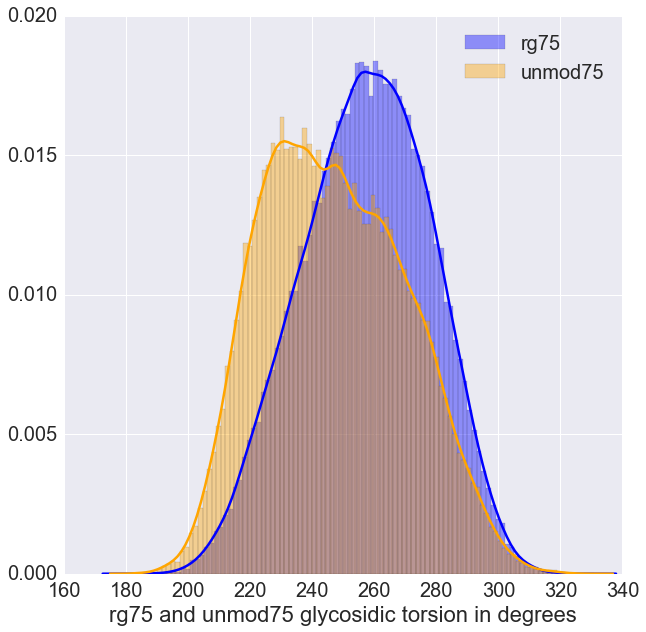

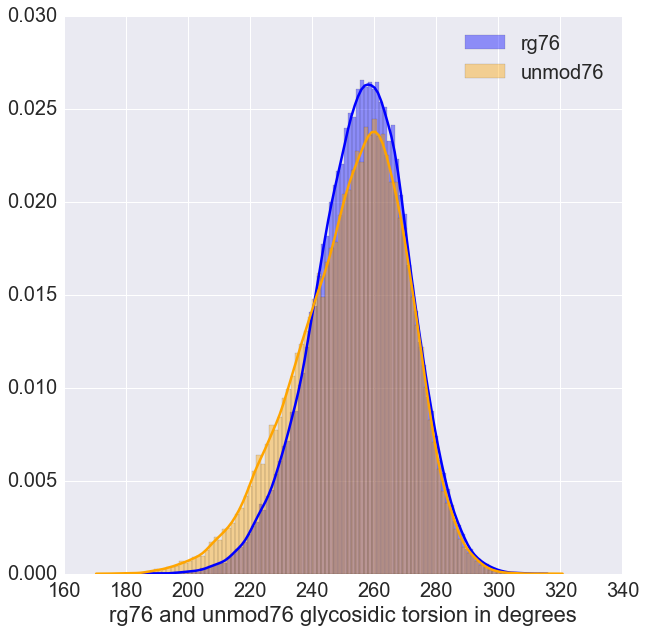

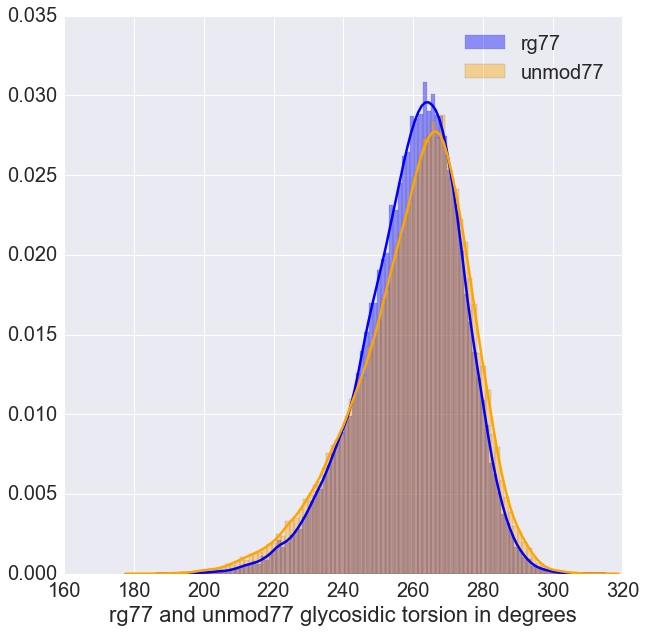

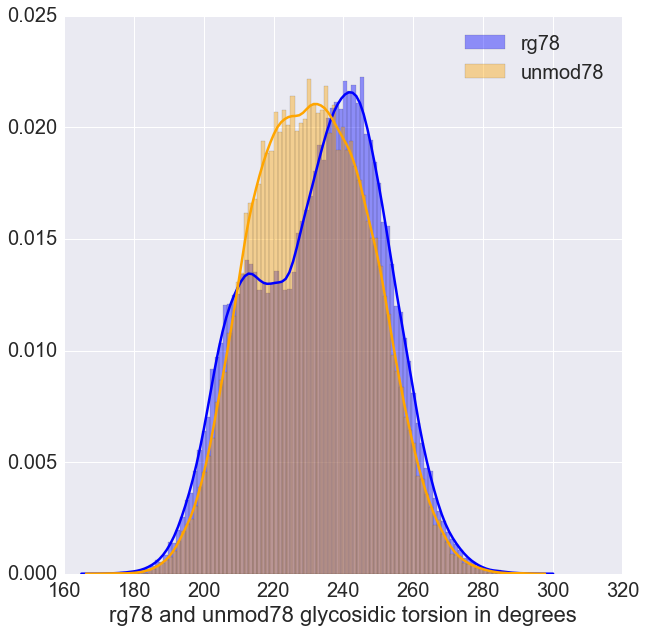

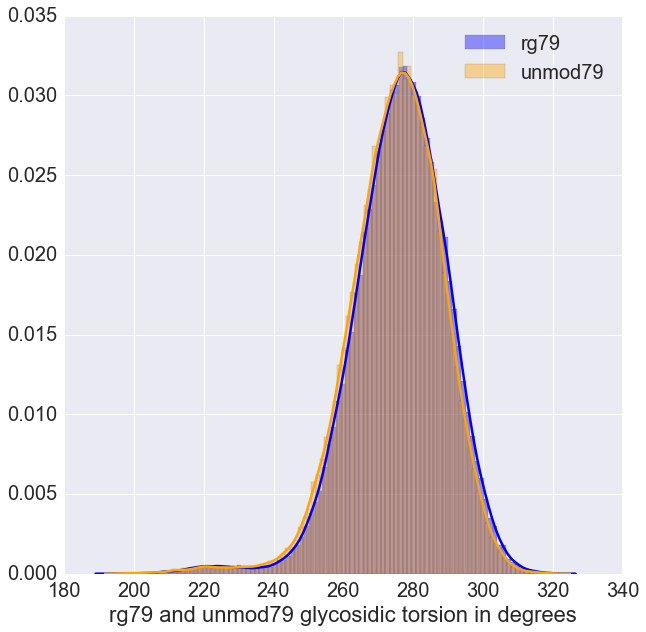

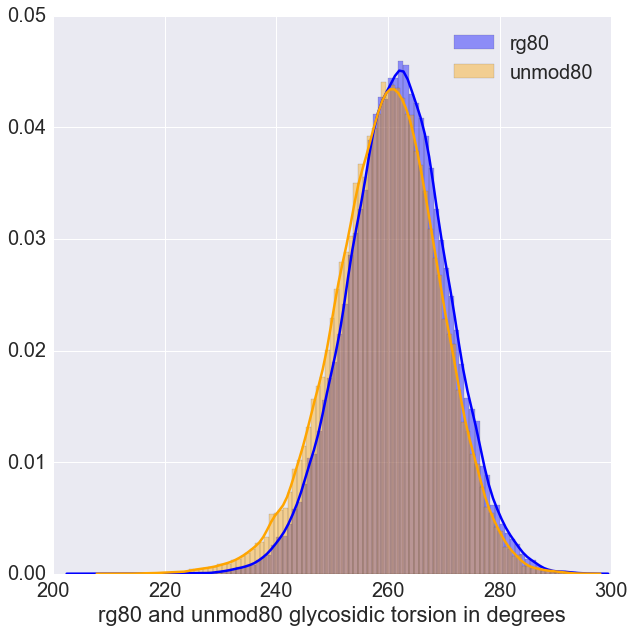

In [27]:
for i in range(67,81):
    print i
    histplot(i)